In [1]:
import datetime
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functools import partial

from utils import Scale
from utils import smooth_signal
from utils import is_dawn_partial, is_day_partial, is_night_partial
from utils import location_station, find_set_sunrise, find_set_sunset

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')
df_station = pd.read_pickle('./data/df_station_sort_re.pkl')

In [3]:
lat = df_station.loc[df_station['identificationstation'] == 'sj2']['latitude'].values[0]
long = df_station.loc[df_station['identificationstation'] == 'sj2']['longitude'].values[0]

In [4]:
is_day = partial(is_day_partial, lat=lat, long=long)
is_night = partial(is_night_partial, lat=lat, long=long)
is_dawn = partial(is_dawn_partial, lat=lat, long=long)

In [5]:
state_day = []
for i in df.index.values:
    state_day.append(is_day(i))

state_day = np.array(state_day)
df['state_day'] = state_day

state_night = []
for i in df.index.values:
    state_night.append(is_night(i))

state_night = np.array(state_night)
df['state_night'] = state_night

state_dawn = []
for i in df.index.values:
    state_dawn.append(is_dawn(i))

state_dawn = np.array(state_dawn)
df['state_dawn'] = state_dawn

In [6]:
df.head(10)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4,state_day,state_night,state_dawn
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334,0.0,0.0,1.0
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397,0.0,0.0,1.0
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683,0.0,0.0,1.0
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552,0.0,0.0,1.0
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917,0.0,0.0,1.0
2013-12-01 04:20:00,28.194797,-1.748643,-0.318996,-1.279775,0.399478,15.846379,2.116655,0.183615,0.0,0.0,1.0
2013-12-01 04:30:00,26.140187,-1.970060,-0.221417,-0.971635,0.295367,17.265745,1.481490,0.186186,0.0,0.0,1.0
2013-12-01 04:40:00,23.954667,-2.040046,-0.069986,-0.856185,0.185794,18.030494,0.804197,0.186092,0.0,0.0,1.0
2013-12-01 04:50:00,21.846906,-1.938287,0.101759,-0.851142,0.127668,18.167486,0.137714,0.185635,0.0,0.0,1.0
2013-12-01 05:00:00,20.044188,-1.686945,0.251341,-0.811061,0.151654,17.689626,-0.491694,0.186621,0.0,0.0,1.0


In [7]:
df['state_day_shift'] = df['state_day'].shift(1)
df.head(10)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4,state_day,state_night,state_dawn,state_day_shift
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334,0.0,0.0,1.0,NaN
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397,0.0,0.0,1.0,0.0
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683,0.0,0.0,1.0,0.0
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552,0.0,0.0,1.0,0.0
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917,0.0,0.0,1.0,0.0
2013-12-01 04:20:00,28.194797,-1.748643,-0.318996,-1.279775,0.399478,15.846379,2.116655,0.183615,0.0,0.0,1.0,0.0
2013-12-01 04:30:00,26.140187,-1.970060,-0.221417,-0.971635,0.295367,17.265745,1.481490,0.186186,0.0,0.0,1.0,0.0
2013-12-01 04:40:00,23.954667,-2.040046,-0.069986,-0.856185,0.185794,18.030494,0.804197,0.186092,0.0,0.0,1.0,0.0
2013-12-01 04:50:00,21.846906,-1.938287,0.101759,-0.851142,0.127668,18.167486,0.137714,0.185635,0.0,0.0,1.0,0.0
2013-12-01 05:00:00,20.044188,-1.686945,0.251341,-0.811061,0.151654,17.689626,-0.491694,0.186621,0.0,0.0,1.0,0.0


In [8]:
vm1 = np.empty(len(df))
vm1[:] = np.nan
df_vm1 = pd.Series(vm1, index=df.index.values)

day_begin = df[(df.state_day == 1.0) & (df.state_day_shift == 0.0)].index.values
day_end = df[(df.state_day == 0.0) & (df.state_day_shift == 1.0)].index.values

if day_begin[0] > day_end[0]:
    day_end = day_end[1:]
if len(day_begin) > len(day_end):
    day_begin = day_begin[0:-1]
    
for day_begin_i, day_end_i in zip(day_begin, day_end):
    df_vm1[day_begin_i] = df[day_begin_i:day_end_i]['vtec'].mean()
    
before_dif_nonnan = np.nan
for idx, value in zip(df_vm1.index, df_vm1):
    if not np.isnan(value) and (value != before_dif_nonnan):
        before_dif_nonnan = value
    if np.isnan(value):
        df_vm1[idx] = before_dif_nonnan

df['vm1'] = df_vm1

vd1 = np.empty(len(df))
vd1[:] = np.nan
df_vd1 = pd.Series(vd1, index=df.index.values)

day_begin = df[(df.state_day == 1.0) & (df.state_day_shift == 0.0)].index.values
day_end = df[(df.state_day == 0.0) & (df.state_day_shift == 1.0)].index.values

if day_begin[0] > day_end[0]:
    day_end = day_end[1:]
if len(day_begin) > len(day_end):
    day_begin = day_begin[0:-1]
    
for day_begin_i, day_end_i in zip(day_begin, day_end):
    df_vd1[day_begin_i] = df[day_begin_i:day_end_i]['vtec'].std()
    
before_dif_nonnan = np.nan
for idx, value in zip(df_vd1.index, df_vd1):
    if not np.isnan(value) and (value != before_dif_nonnan):
        before_dif_nonnan = value
    if np.isnan(value):
        df_vd1[idx] = before_dif_nonnan

df['vd1'] = df_vd1

In [9]:
delta_t = np.timedelta64(1, 'h')

vm2 = np.empty(len(df))
vm2[:] = np.nan
df_vm2 = pd.Series(vm2, index=df.index.values)

day_begin = df[(df.state_day == 1.0) & (df.state_day_shift == 0.0)].index.values
day_end = df[(df.state_day == 0.0) & (df.state_day_shift == 1.0)].index.values

if day_begin[0] > day_end[0]:
    day_end = day_end[1:]
if len(day_begin) > len(day_end):
    day_begin = day_begin[0:-1]
    
day_end += delta_t

# remove o dia final se cair pra fora da série
if day_end[-1] not in df_vm2.index:
    day_end = day_end[0:-1]
    day_begin = day_begin[0:-1]
    
for day_begin_i, day_end_i in zip(day_begin, day_end):
    df_vm2[day_begin_i] = df[day_begin_i:day_end_i]['vtec'].mean()
    
before_dif_nonnan = np.nan
for idx, value in zip(df_vm2.index, df_vm2):
    if not np.isnan(value) and (value != before_dif_nonnan):
        before_dif_nonnan = value
    if np.isnan(value):
        df_vm2[idx] = before_dif_nonnan
        
df['vm2'] = df_vm2
        
vd2 = np.empty(len(df))
vd2[:] = np.nan
df_vd2 = pd.Series(vd2, index=df.index.values)

day_begin = df[(df.state_day == 1.0) & (df.state_day_shift == 0.0)].index.values
day_end = df[(df.state_day == 0.0) & (df.state_day_shift == 1.0)].index.values

if day_begin[0] > day_end[0]:
    day_end = day_end[1:]
if len(day_begin) > len(day_end):
    day_begin = day_begin[0:-1]
    
day_end += delta_t

# remove o dia final se cair pra fora da série
if day_end[-1] not in df_vd2.index:
    day_end = day_end[0:-1]
    day_begin = day_begin[0:-1]
    
for day_begin_i, day_end_i in zip(day_begin, day_end):
    df_vd2[day_begin_i] = df[day_begin_i:day_end_i]['vtec'].std()
    
before_dif_nonnan = np.nan
for idx, value in zip(df_vd2.index, df_vd2):
    if not np.isnan(value) and (value != before_dif_nonnan):
        before_dif_nonnan = value
    if np.isnan(value):
        df_vd2[idx] = before_dif_nonnan
        
df['vd2'] = df_vd2

In [10]:
df['gvtec1_dt_lag_9'] = smooth_signal(df['gvtec1'] -  df['gvtec1'].shift(9))
df['gvtec2_dt_lag_20'] = smooth_signal(df['gvtec2'] -  df['gvtec2'].shift(20))

/usr/local/anaconda/envs/dscience/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [11]:
df['vtec_dt_lag_3'] = smooth_signal(df['vtec'] -  df['vtec'].shift(3))

In [12]:
df = df.dropna()

df = df[['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
         'gvtec2_dt', 'state_day', 'state_night', 'state_dawn',
         'vm1', 'vd1', 'vm2', 'vd2', 'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4']]

df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,state_day,state_night,state_dawn,vm1,vd1,vm2,vd2,gvtec1_dt_lag_9,gvtec2_dt_lag_20,vtec_dt_lag_3,s4
2013-12-01 08:10:00,8.743023,0.456989,0.199768,-0.163274,0.265675,11.068904,0.076896,1.0,0.0,0.0,40.635861,12.624579,40.547146,12.192698,-0.347095,-6.953822,0.702014,0.175079
2013-12-01 08:20:00,9.317340,0.617147,0.160157,-0.024616,0.175761,10.913643,-0.055683,1.0,0.0,0.0,40.635861,12.624579,40.547146,12.192698,0.311164,-6.517811,1.331357,0.172558
2013-12-01 08:30:00,10.031213,0.787791,0.170644,-0.010049,0.098937,10.642994,-0.113292,1.0,0.0,0.0,40.635861,12.624579,40.547146,12.192698,0.850370,-5.574060,1.861927,0.173000
2013-12-01 08:40:00,10.951989,1.005392,0.217601,-0.020198,0.071462,10.450810,-0.066114,1.0,0.0,0.0,40.635861,12.624579,40.547146,12.192698,1.256265,-4.130688,2.410329,0.175779
2013-12-01 08:50:00,12.157663,1.266817,0.261425,0.042286,0.101255,10.489220,0.066586,1.0,0.0,0.0,40.635861,12.624579,40.547146,12.192698,1.530638,-2.281478,3.060000,0.180158


In [13]:
df.to_pickle('./data/sj2_analise_update.pkl')
df.to_csv('./data/sj2_analise_update.csv')

In [14]:
# to s4 data
value_min_s4 = df['s4'].min()
value_max_s4 = df['s4'].max()

print('Valor mínimo de s4:', value_min_s4)
print('Valor máximo de s4:', value_max_s4)

scale_s4 = Scale(value_min_s4, value_max_s4)
s4_scale = pd.Series(scale_s4(df['s4'].values.ravel()), index=df.index)

# to gvtec_lag_9 data
value_min_gvtec_lag_9 = df['gvtec1_dt_lag_9'].min()
value_max_gvtec_lag_9 = df['gvtec1_dt_lag_9'].max()

print('Valor mínimo de gvtec_lag_9:', value_min_gvtec_lag_9)
print('Valor máximo de gvtec_lag_9:', value_max_gvtec_lag_9)

scale_gvtec_lag_9 = Scale(value_min_gvtec_lag_9, value_max_gvtec_lag_9)
gvtec_lag_9_scale = pd.Series(scale_gvtec_lag_9(df['gvtec1_dt_lag_9'].values.ravel()), index=df.index)

# to gvtec_lag_20 data
value_min_gvtec_lag_20 = df['gvtec2_dt_lag_20'].min()
value_max_gvtec_lag_20 = df['gvtec2_dt_lag_20'].max()

print('Valor mínimo de gvtec_lag_20:', value_min_gvtec_lag_20)
print('Valor máximo de gvtec_lag_20:', value_max_gvtec_lag_20)

scale_gvtec_lag_20 = Scale(value_min_gvtec_lag_20, value_max_gvtec_lag_20)
gvtec_lag_20_scale = pd.Series(scale_gvtec_lag_20(df['gvtec2_dt_lag_20'].values.ravel()), index=df.index)


Valor mínimo de s4: 0.11990822024186153
Valor máximo de s4: 0.7698330806187225
Valor mínimo de gvtec_lag_9: -24.398162613824905
Valor máximo de gvtec_lag_9: 37.24770339502257
Valor mínimo de gvtec_lag_20: -43.50715052462599
Valor máximo de gvtec_lag_20: 63.55536709238061


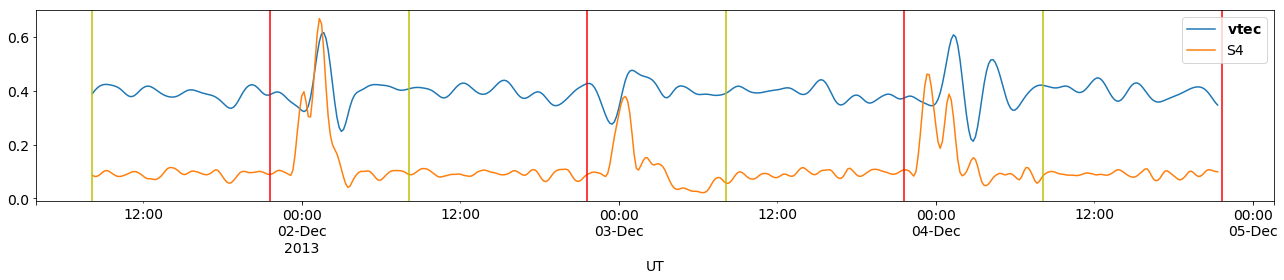

In [15]:
a = 0
b = 512

fig, ax = plt.subplots(1, 1)
figsize=(18, 4)
gvtec_lag_9_scale[a:b].plot(figsize=figsize, ax=ax, label=r'$\bf vtec$')
s4_scale[a:b].plot(figsize=figsize, ax=ax, label='S4')
ax.legend(loc="upper right")
ax.set(xlabel='UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(s4_scale[a:b], lat, long)
set_of_sunset = find_set_sunset(s4_scale[a:b], lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/gvtec1_lag_9_scatter.eps', format='eps', dpi=1000)

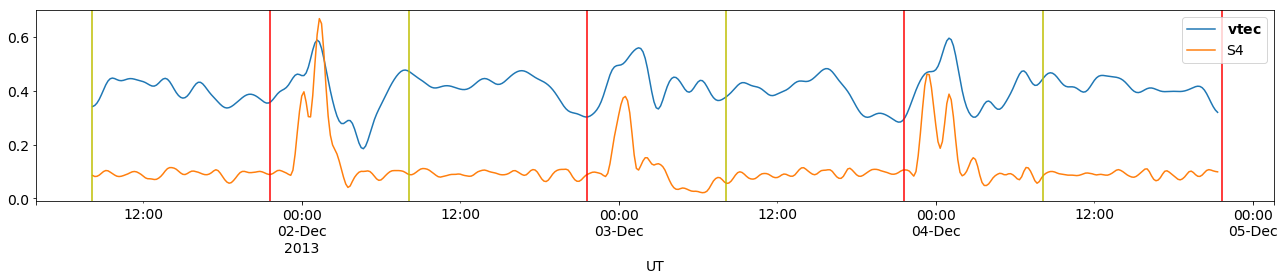

In [16]:
a = 0
b = 512

fig, ax = plt.subplots(1, 1)
figsize=(18, 4)
gvtec_lag_20_scale[a:b].plot(figsize=figsize, ax=ax, label=r'$\bf vtec$')
s4_scale[a:b].plot(figsize=figsize, ax=ax, label='S4')
ax.legend(loc="upper right")
ax.set(xlabel='UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(s4_scale[a:b], lat, long)
set_of_sunset = find_set_sunset(s4_scale[a:b], lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/gvtec2_lag_20_scatter.eps', format='eps', dpi=1000)